# 0-Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import itertools
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,ConfusionMatrixDisplay, balanced_accuracy_score
#from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import Normalizer, StandardScaler, MinMaxScaler, MaxAbsScaler, RobustScaler, QuantileTransformer, PowerTransformer
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, LeakyReLU, BatchNormalization, Reshape

from keras import regularizers
from keras.optimizers import Adam
#from keras.backend import expand_dims
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras.models import Sequential
from keras.constraints import MaxNorm
from keras.layers import Activation, Dense, Conv1D, Flatten, MaxPooling1D, Dropout, BatchNormalization, SpatialDropout1D

2025-01-19 13:44:38.847882: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-01-19 13:44:38.985553: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-01-19 13:44:39.021485: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-19 13:44:39.610188: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; 

## Librerias oversampling


In [2]:
import torch
from torch import nn

import math
import matplotlib.pyplot as plt

In [3]:
METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'),
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
      keras.metrics.AUC(name='prc', curve='PR'), # precision-recall curve
]

2025-01-19 13:44:45.025732: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-01-19 13:44:45.467750: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1616] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 14120 MB memory:  -> device: 0, name: NVIDIA RTX A4000, pci bus id: 0000:c3:00.0, compute capability: 8.6


# 1- Load Data

In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.utils import shuffle
from tensorflow.keras import layers


In [5]:
s_aureus = pd.read_csv('e_coli_driams_b_2000_20000Da_v2 (1).csv')
s_aureus = s_aureus.fillna(0)
s_aureus

,2000,2003,2006,2009,2012,2015,2018,2021,2024,2027,...,19988,19991,19994,19997,code,species,Ciprofloxacin,Ceftriaxone,Cefepime,Piperacillin-Tazobactam
0,1067.142857,1251.714286,1310.571429,1021.142857,1315.625000,974.000000,936.857143,853.571429,936.142857,1044.285714,...,21.500000,6.500000,4.666667,17.585859,dcd5aa31-b254-4961-b69f-ccc8c0572b27,Escherichia coli,0.0,0.0,0.0,0.0
1,1872.857143,1677.285714,2035.714286,2086.250000,1930.571429,2017.142857,1856.857143,1655.857143,1547.142857,1713.000000,...,21.000000,15.000000,26.500000,21.736842,dfcb7221-e4f8-4a39-b661-7e439f19e93d,Escherichia coli,0.0,0.0,0.0,0.0
2,3258.142857,3209.428571,3068.571429,3162.428571,3275.000000,3324.571429,2999.000000,2970.500000,3213.000000,3205.571429,...,17.000000,17.000000,30.000000,19.125000,d5bb4389-5053-4107-9c05-bfed9e9159c9,Escherichia coli,0.0,0.0,0.0,0.0
3,18912.571429,19530.571429,19464.875000,19098.714286,18994.714286,18936.285714,19208.571429,19417.571429,19486.857143,19048.625000,...,299.000000,339.500000,359.000000,311.746032,4e14943f-ae22-42ed-aef5-65430470dcfa,Escherichia coli,0.0,0.0,0.0,0.0
4,1685.000000,1537.428571,1283.714286,1472.285714,1370.142857,1402.142857,1397.500000,1422.142857,1725.285714,3386.714286,...,32.500000,48.333333,66.500000,39.230769,617f14d0-86b1-4c28-8995-b02006a85e81,Escherichia coli,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208,1933.285714,1956.500000,2012.571429,1882.000000,1955.142857,1951.285714,1943.714286,2055.125000,1928.857143,1687.571429,...,121.000000,126.666667,147.500000,122.560748,a98443f0-c379-4aa9-abe5-b57f6186ba13,Escherichia coli,1.0,0.0,0.0,0.0
209,7296.714286,6215.714286,6115.500000,6069.000000,6585.857143,6207.857143,5809.142857,5879.142857,6068.714286,8413.125000,...,163.500000,183.000000,173.000000,178.163462,9d41489e-e707-4898-b930-e89aef9e04ad,Escherichia coli,1.0,1.0,1.0,1.0
210,2604.500000,2626.857143,2614.857143,2408.142857,2628.428571,2723.571429,2561.142857,2282.000000,2479.375000,2511.571429,...,19.000000,10.500000,4.666667,13.857143,d69f1a75-9609-492f-a963-bbe633ed486d,Escherichia coli,1.0,1.0,1.0,1.0
211,1341.142857,1190.000000,1399.142857,1469.000000,1126.000000,1049.428571,958.857143,1092.000000,1206.857143,1211.000000,...,22.666667,17.500000,17.000000,20.863636,e31f559e-9cd1-49fc-98e0-d9bcd980cbc4,Escherichia coli,0.0,0.0,0.0,0.0


# Preprocessing Data

In [6]:
s_aureus = s_aureus.drop(columns=['code','species', 'Ceftriaxone', 'Cefepime', 'Piperacillin-Tazobactam'])
s_aureus.dropna(axis=0, how="any", inplace=True)

In [7]:
s_aureus.head()

,2000,2003,2006,2009,2012,2015,2018,2021,2024,2027,...,19973,19976,19979,19982,19985,19988,19991,19994,19997,Ciprofloxacin
0,1067.142857,1251.714286,1310.571429,1021.142857,1315.625000,974.000000,936.857143,853.571429,936.142857,1044.285714,...,19.666667,20.000000,23.0,42.666667,15.000000,21.5,6.500000,4.666667,17.585859,0.0
1,1872.857143,1677.285714,2035.714286,2086.250000,1930.571429,2017.142857,1856.857143,1655.857143,1547.142857,1713.000000,...,32.000000,29.666667,30.0,18.000000,17.000000,21.0,15.000000,26.500000,21.736842,0.0
2,3258.142857,3209.428571,3068.571429,3162.428571,3275.000000,3324.571429,2999.000000,2970.500000,3213.000000,3205.571429,...,19.666667,20.000000,23.5,14.500000,13.666667,17.0,17.000000,30.000000,19.125000,0.0
3,18912.571429,19530.571429,19464.875000,19098.714286,18994.714286,18936.285714,19208.571429,19417.571429,19486.857143,19048.625000,...,299.000000,269.333333,282.0,300.500000,311.000000,299.0,339.500000,359.000000,311.746032,0.0
4,1685.000000,1537.428571,1283.714286,1472.285714,1370.142857,1402.142857,1397.500000,1422.142857,1725.285714,3386.714286,...,25.000000,34.000000,33.0,37.333333,21.000000,32.5,48.333333,66.500000,39.230769,1.0


In [10]:
X = s_aureus.iloc[:, 0:6000].values  # variables independientes (espectros de masa)
y = s_aureus.iloc[:, 6000].values    # variable dependientes (resistencia a ciprofloxacin)
X = np.asarray(X).astype(np.float32)
y = np.asarray(y).astype(np.float32)

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)


In [12]:
bacteria = s_aureus.columns[-1]

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify=y)

In [14]:
X_train

array([[-0.39234772, -0.4328882 , -0.42397916, ...,  0.2516329 ,
         0.27382737,  0.04491132],
       [-0.49214137, -0.5005734 , -0.47686246, ..., -0.56689554,
        -0.56091934, -0.59598553],
       [-0.33472997, -0.40271908, -0.35519633, ..., -0.38830754,
         0.2489837 ,  0.00755902],
       ...,
       [-0.12541495, -0.03057765, -0.05932636, ..., -0.2791704 ,
        -0.14354599, -0.30955842],
       [ 0.01859542, -0.05076646,  0.01312031, ..., -0.1650725 ,
         0.3781707 ,  0.08042048],
       [-0.1681521 , -0.17944825, -0.1268649 , ...,  0.2962799 ,
         0.244015  ,  0.88604414]], dtype=float32)

## Aplicacion de gan

Etiquetas

In [15]:
import torch

# Supongamos que tienes las etiquetas de clase como un array
y_train = np.array(y_train)  # Ejemplo de etiquetas de entrenamiento

# Convertir las etiquetas a formato one-hot
num_classes = 2  # Solo tenemos dos clases (0 y 1)
y_train_one_hot = torch.zeros(len(y_train), num_classes)
y_train_one_hot[range(len(y_train)), y_train.astype(int)] = 1

print(y_train_one_hot)



tensor([[0., 1.],
        [0., 1.],
        [1., 0.],
        ...,
        [1., 0.],
        [1., 0.],
        [1., 0.]])


In [16]:
y_train

array([1., 1., 0., ..., 0., 0., 0.], dtype=float32)

In [17]:
from sklearn.decomposition import PCA
# Reducir dimensiones con PCA
pca = PCA(n_components=2)
X_train_pca_2d = pca.fit_transform(X_train)

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_pca_2d_normalizer = scaler.fit_transform(X_train_pca_2d)


In [88]:
train_set = [
    (X_train_pca_2d_normalizer[i], y_train[i]) for i in range(len(X_train_pca_2d_normalizer))
]

In [89]:
train_set

[(array([-0.2153751, -0.5238471], dtype=float32), 1.0),
 (array([-0.7855083 , -0.29749078], dtype=float32), 1.0),
 (array([ 0.08455414, -0.00035013], dtype=float32), 0.0),
 (array([-0.153142  ,  0.73857516], dtype=float32), 0.0),
 (array([-0.01154708,  1.4393549 ], dtype=float32), 0.0),
 (array([ 0.457982 , -0.4888222], dtype=float32), 0.0),
 (array([-0.67640567,  0.03268394], dtype=float32), 0.0),
 (array([-0.2533514,  1.2791336], dtype=float32), 0.0),
 (array([-0.62281334, -0.1711558 ], dtype=float32), 1.0),
 (array([ 0.14629334, -0.9358718 ], dtype=float32), 0.0),
 (array([-0.42119214, -0.22042261], dtype=float32), 0.0),
 (array([ 0.03106115, -0.67694503], dtype=float32), 0.0),
 (array([-0.40988016,  0.15898539], dtype=float32), 0.0),
 (array([-0.70833385,  0.6837307 ], dtype=float32), 0.0),
 (array([3.5190425, 0.4399054], dtype=float32), 1.0),
 (array([ 0.25814465, -0.7986747 ], dtype=float32), 0.0),
 (array([-0.47263375, -0.28682238], dtype=float32), 0.0),
 (array([-0.4304976,  0.

In [90]:
class Discriminator(nn.Module):
    def __init__(self, num_classes):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(2 + num_classes, 256),  # Añadir las etiquetas como entrada
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(64, 1),
            nn.Sigmoid(),
        )

    def forward(self, x, labels):
        # Concatenar las muestras con las etiquetas
        x = torch.cat((x, labels), dim=1)
        return self.model(x)


In [91]:
class Generator(nn.Module):
    def __init__(self, num_classes):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(2 + num_classes, 16),  # Añadir las etiquetas como entrada
            nn.ReLU(),
            nn.Linear(16, 32),
            nn.ReLU(),
            nn.Linear(32, 2),
        )

    def forward(self, x, labels):
        # Concatenar el ruido con las etiquetas
        x = torch.cat((x, labels), dim=1)
        return self.model(x)

generator = Generator(2)

In [92]:
discriminator = Discriminator(2)

In [100]:
lr = 0.0002
num_epochs = 600
loss_function = nn.BCELoss()

In [94]:
batch_size = 32
train_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size, shuffle=True, drop_last=True)


In [95]:
train_set

[(array([-0.2153751, -0.5238471], dtype=float32), 1.0),
 (array([-0.7855083 , -0.29749078], dtype=float32), 1.0),
 (array([ 0.08455414, -0.00035013], dtype=float32), 0.0),
 (array([-0.153142  ,  0.73857516], dtype=float32), 0.0),
 (array([-0.01154708,  1.4393549 ], dtype=float32), 0.0),
 (array([ 0.457982 , -0.4888222], dtype=float32), 0.0),
 (array([-0.67640567,  0.03268394], dtype=float32), 0.0),
 (array([-0.2533514,  1.2791336], dtype=float32), 0.0),
 (array([-0.62281334, -0.1711558 ], dtype=float32), 1.0),
 (array([ 0.14629334, -0.9358718 ], dtype=float32), 0.0),
 (array([-0.42119214, -0.22042261], dtype=float32), 0.0),
 (array([ 0.03106115, -0.67694503], dtype=float32), 0.0),
 (array([-0.40988016,  0.15898539], dtype=float32), 0.0),
 (array([-0.70833385,  0.6837307 ], dtype=float32), 0.0),
 (array([3.5190425, 0.4399054], dtype=float32), 1.0),
 (array([ 0.25814465, -0.7986747 ], dtype=float32), 0.0),
 (array([-0.47263375, -0.28682238], dtype=float32), 0.0),
 (array([-0.4304976,  0.

In [96]:
optimizer_discriminator = torch.optim.Adam(discriminator.parameters(), lr=lr * 0.5)
optimizer_generator = torch.optim.Adam(generator.parameters(), lr=lr)

In [101]:
for epoch in range(num_epochs):
    for n, (real_samples, labels) in enumerate(train_loader):
        # Convertir etiquetas a formato one-hot
        labels_one_hot = torch.zeros(batch_size, num_classes)
        labels_one_hot.scatter_(1, labels.view(-1, 1).long(), 1)

        # Datos reales
        real_samples_labels = torch.ones((batch_size, 1))

        # Datos generados
        latent_space_samples = torch.randn((batch_size, 2))
        generated_samples = generator(latent_space_samples, labels_one_hot)
        generated_samples_labels = torch.zeros((batch_size, 1))

        # Concatenar muestras reales y generadas
        all_samples = torch.cat((real_samples, generated_samples))
        all_samples_labels = torch.cat((real_samples_labels, generated_samples_labels))
        all_labels_one_hot = torch.cat((labels_one_hot, labels_one_hot))

        # Entrenar el discriminador
        discriminator.zero_grad()
        output_discriminator = discriminator(all_samples, all_labels_one_hot)
        loss_discriminator = loss_function(output_discriminator, all_samples_labels)
        loss_discriminator.backward()
        optimizer_discriminator.step()

        # Entrenar el generador
        generator.zero_grad()
        latent_space_samples = torch.randn((batch_size, 2))
        generated_samples = generator(latent_space_samples, labels_one_hot)
        output_discriminator_generated = discriminator(generated_samples, labels_one_hot)
        loss_generator = loss_function(output_discriminator_generated, real_samples_labels)
        loss_generator.backward()
        optimizer_generator.step()
        # Show loss
        if epoch % 10 == 0 and n == batch_size - 1:
            print(f"Epoch: {epoch} Loss D.: {loss_discriminator}")
            print(f"Epoch: {epoch} Loss G.: {loss_generator}")



Epoch: 0 Loss D.: 0.6693299412727356
Epoch: 0 Loss G.: 0.7100014090538025
Epoch: 10 Loss D.: 0.6950757503509521
Epoch: 10 Loss G.: 0.6998443007469177
Epoch: 20 Loss D.: 0.6757604479789734
Epoch: 20 Loss G.: 0.829875111579895
Epoch: 30 Loss D.: 0.6880277395248413
Epoch: 30 Loss G.: 0.6900187730789185
Epoch: 40 Loss D.: 0.6867203712463379
Epoch: 40 Loss G.: 0.7428917288780212
Epoch: 50 Loss D.: 0.6950830221176147
Epoch: 50 Loss G.: 0.6984323263168335
Epoch: 60 Loss D.: 0.6983733177185059
Epoch: 60 Loss G.: 0.6921346187591553
Epoch: 70 Loss D.: 0.6869987845420837
Epoch: 70 Loss G.: 0.6994984149932861
Epoch: 80 Loss D.: 0.7117559909820557
Epoch: 80 Loss G.: 0.6403326392173767
Epoch: 90 Loss D.: 0.6821796894073486
Epoch: 90 Loss G.: 0.6899164915084839
Epoch: 100 Loss D.: 0.6970623731613159
Epoch: 100 Loss G.: 0.6732510328292847
Epoch: 110 Loss D.: 0.7331206202507019
Epoch: 110 Loss G.: 0.658414363861084
Epoch: 120 Loss D.: 0.6887162327766418
Epoch: 120 Loss G.: 0.7195660471916199
Epoch: 130

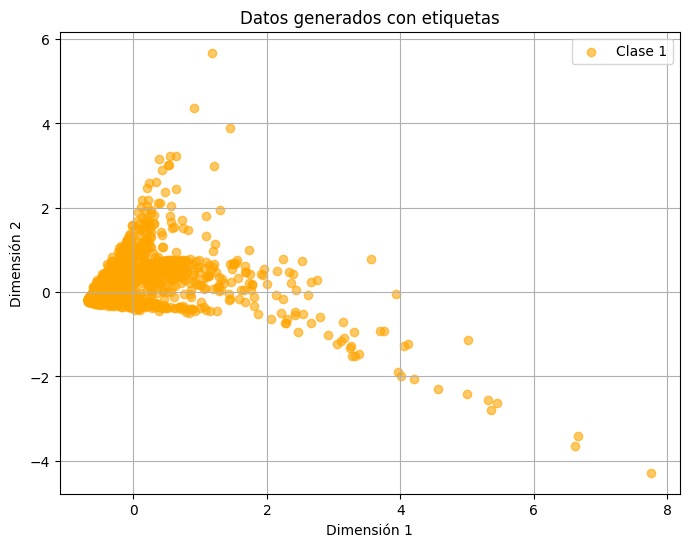

In [102]:
import matplotlib.pyplot as plt

# Generar datos de prueba
latent_space_samples = torch.randn((3000, 2))  # Ruido para 100 muestras
labels = torch.randint(0, 2, (3000,))  # Etiquetas aleatorias (0 o 1)

# Convertir etiquetas a one-hot
labels_one_hot = torch.zeros(len(labels), 2)
labels_one_hot.scatter_(1, labels.view(-1, 1).long(), 1)

# Generar datos con el generador
generated_samples = generator(latent_space_samples, labels_one_hot).detach().numpy()
labels_numpy = labels.numpy()  # Convertir las etiquetas a numpy para graficar

# Separar puntos por clase
class_0 = generated_samples[labels_numpy == 0]
class_1 = generated_samples[labels_numpy == 1]

# Graficar datos generados con etiquetas
plt.figure(figsize=(8, 6))
plt.scatter(class_1[:, 0], class_1[:, 1], label='Clase 1', alpha=0.6, color='orange')
#plt.scatter(class_0[:, 0], class_0[:, 1], label='Clase 0', alpha=0.6, color='blue')

plt.title("Datos generados con etiquetas")
plt.xlabel("Dimensión 1")
plt.ylabel("Dimensión 2")
plt.legend()
plt.grid()
plt.show()


In [103]:
class_0

array([[-0.35710847, -0.22114392],
       [-0.48618126, -0.26047042],
       [-0.17956747,  0.51566267],
       ...,
       [-0.08926402,  0.5092628 ],
       [ 0.527101  ,  1.6814466 ],
       [-0.60298973, -0.127492  ]], dtype=float32)

In [73]:
print(pd.Series(y_train).value_counts())

0.0    2451
1.0     581
Name: count, dtype: int64


In [72]:
len(X_train)

3032

In [ ]:
print(pd.Series(y_train_balanced).value_counts())


0.0    2451
1.0    2451
Name: count, dtype: int64


In [ ]:
scaler=Normalizer(norm='max')
sc_X = scaler
X_train = sc_X.fit_transform(X_train_balanced)
X_test = sc_X.transform(X_test)

In [ ]:
X_train_balanced.shape[0]

4902

In [ ]:
sample_size = X_train_balanced.shape[0] # numero de muestras en el set de datos
time_steps  = X_train_balanced.shape[1] # numero de atributos en el set de datos
input_dimension = 1            #

X_train_reshaped = X_train_balanced.reshape(sample_size,time_steps,input_dimension)
X_test_reshaped = X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [ ]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, min_lr=0.000001)
early_st = EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True)

n_timesteps = X_train_reshaped.shape[1] #
n_features  = X_train_reshaped.shape[2] #

# Create and fit DeepAMR model

In [ ]:
model = Sequential(name="Modelo_s_aureus_ciprofloxacin")
init_mode = 'normal'
model.add(Conv1D(filters=(64), kernel_size=(17), input_shape = (n_timesteps,n_features), name='Conv_1'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size=2, name="MaxPooling1D_1"))

model.add(Conv1D(filters=(128), kernel_size=(9),kernel_initializer=init_mode, kernel_regularizer=regularizers.l2(0.0001),  name='Conv_2'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size=2, name="MaxPooling1D_2"))

model.add(Conv1D(filters=(256), kernel_size=(5),kernel_initializer=init_mode,kernel_regularizer=regularizers.l2(0.0001),   name='Conv_3'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size=2, name="MaxPooling1D_3"))

model.add(Conv1D(filters=(256), kernel_size=(5),kernel_initializer=init_mode, kernel_regularizer=regularizers.l2(0.0001),   name='Conv_4'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size=2, name="MaxPooling1D_4"))

model.add(Flatten())
model.add(Dropout(0.65))
model.add(Dense(256, activation='relu',kernel_initializer=init_mode, kernel_regularizer=regularizers.l2(0.0001), name="fully_connected_0"))
model.add(Dense(64, activation='relu',kernel_initializer=init_mode, kernel_regularizer=regularizers.l2(0.0001), name="fully_connected_1"))
model.add(Dense(64, activation='relu',kernel_initializer=init_mode, kernel_regularizer=regularizers.l2(0.0001),  name="fully_connected_2"))
model.add(Dense(n_features, activation='sigmoid', name="OUT_Layer"))

model.compile(optimizer = Adam(learning_rate=0.0001), loss = 'binary_crossentropy',  metrics=METRICS)
model.summary()

/home/hpinto/.local/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "Modelo_s_aureus_ciprofloxacin"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Conv_1 (Conv1D)                 │ (None, 5984, 64)       │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 5984, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 5984, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ MaxPooling1D_1 (MaxPooling1D)   │ (None, 2992, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv_2 (Conv1D)                 │ (None, 2984, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 2984, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 2984, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ MaxPooling1D_2 (MaxPooling1D)   │ (None, 1492, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv_3 (Conv1D)                 │ (None, 1488, 256)      │       164,096 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 1488, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 1488, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ MaxPooling1D_3 (MaxPooling1D)   │ (None, 744, 256)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv_4 (Conv1D)                 │ (None, 740, 256)       │       327,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 740, 256)       │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 740, 256)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ MaxPooling1D_4 (MaxPooling1D)   │ (None, 370, 256)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 94720)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 94720)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fully_connected_0 (Dense)       │ (None, 256)            │    24,248,576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fully_connected_1 (Dense)       │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fully_connected_2 (Dense)       │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ OUT_Layer (Dense)               │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,839,105 (94.75 MB)

 Trainable params: 24,837,697 (94.75 MB)

 Non-trainable params: 1,408 (5.50 KB)

In [ ]:
history = model.fit(X_train_reshaped, y_train_balanced, epochs=1, batch_size=10, verbose=1, validation_split=0.1, callbacks=[reduce_lr,early_st])

E0000 00:00:1733438931.072205 3674732 cuda_dnn.cc:522] Loaded runtime CuDNN library: 9.1.1 but source was compiled with: 9.3.0.  CuDNN library needs to have matching major version and equal or higher minor version. If using a binary install, upgrade your CuDNN library.  If building from sources, make sure the library loaded at runtime is compatible with the version specified during compile configuration.
E0000 00:00:1733438931.239136 3674732 cuda_dnn.cc:522] Loaded runtime CuDNN library: 9.1.1 but source was compiled with: 9.3.0.  CuDNN library needs to have matching major version and equal or higher minor version. If using a binary install, upgrade your CuDNN library.  If building from sources, make sure the library loaded at runtime is compatible with the version specified during compile configuration.
2024-12-05 19:48:51.250310: W tensorflow/core/framework/op_kernel.cc:1841] OP_REQUIRES failed at xla_ops.cc:577 : FAILED_PRECONDITION: DNN library initialization failed. Look at the er

FailedPreconditionError: Graph execution error:

Detected at node StatefulPartitionedCall defined at (most recent call last):
  File "/usr/lib/python3.9/runpy.py", line 197, in _run_module_as_main

  File "/usr/lib/python3.9/runpy.py", line 87, in _run_code

  File "/home/hpinto/.local/lib/python3.9/site-packages/ipykernel_launcher.py", line 18, in <module>

  File "/home/hpinto/.local/lib/python3.9/site-packages/traitlets/config/application.py", line 1075, in launch_instance

  File "/home/hpinto/.local/lib/python3.9/site-packages/ipykernel/kernelapp.py", line 739, in start

  File "/home/hpinto/.local/lib/python3.9/site-packages/tornado/platform/asyncio.py", line 205, in start

  File "/usr/lib/python3.9/asyncio/base_events.py", line 596, in run_forever

  File "/usr/lib/python3.9/asyncio/base_events.py", line 1890, in _run_once

  File "/usr/lib/python3.9/asyncio/events.py", line 80, in _run

  File "/home/hpinto/.local/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 545, in dispatch_queue

  File "/home/hpinto/.local/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 534, in process_one

  File "/home/hpinto/.local/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 437, in dispatch_shell

  File "/home/hpinto/.local/lib/python3.9/site-packages/ipykernel/ipkernel.py", line 362, in execute_request

  File "/home/hpinto/.local/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 778, in execute_request

  File "/home/hpinto/.local/lib/python3.9/site-packages/ipykernel/ipkernel.py", line 449, in do_execute

  File "/home/hpinto/.local/lib/python3.9/site-packages/ipykernel/zmqshell.py", line 549, in run_cell

  File "/home/hpinto/.local/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3048, in run_cell

  File "/home/hpinto/.local/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3103, in _run_cell

  File "/home/hpinto/.local/lib/python3.9/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner

  File "/home/hpinto/.local/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3308, in run_cell_async

  File "/home/hpinto/.local/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3490, in run_ast_nodes

  File "/home/hpinto/.local/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3550, in run_code

  File "/tmp/ipykernel_3674476/2643947770.py", line 1, in <module>

  File "/home/hpinto/.local/lib/python3.9/site-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/home/hpinto/.local/lib/python3.9/site-packages/keras/src/backend/tensorflow/trainer.py", line 368, in fit

  File "/home/hpinto/.local/lib/python3.9/site-packages/keras/src/backend/tensorflow/trainer.py", line 216, in function

  File "/home/hpinto/.local/lib/python3.9/site-packages/keras/src/backend/tensorflow/trainer.py", line 129, in multi_step_on_iterator

DNN library initialization failed. Look at the errors above for more details.
	 [[{{node StatefulPartitionedCall}}]] [Op:__inference_multi_step_on_iterator_7962]

In [ ]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)



RuntimeError: Physical devices cannot be modified after being initialized

# Evaluate the model

In [ ]:
y_pred  = model.predict(X_test_reshaped)
y_pred = (y_pred>0.5)
cm = confusion_matrix(y_test, y_pred)
print(cm)

24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 66ms/step
[[614   0]
 [145   0]]


In [ ]:
print("balanced acuracy:", balanced_accuracy_score(y_test, y_pred))

balanced acuracy: 0.5


In [ ]:
target_names=["0","1"]
print(classification_report(y_test, y_pred, target_names=target_names))

train_predictions_baseline = model.predict(X_train_reshaped, batch_size=10)
test_predictions_baseline = model.predict(X_test_reshaped, batch_size=10)

baseline_results = model.evaluate(X_test_reshaped, y_test, verbose=0)
for name, value in zip(model.metrics_names, baseline_results):
  print(name, ': ', value)
print()

              precision    recall  f1-score   support

           0       0.81      1.00      0.89       614
           1       0.00      0.00      0.00       145

    accuracy                           0.81       759
   macro avg       0.40      0.50      0.45       759
weighted avg       0.65      0.81      0.72       759



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


491/491 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step
loss :  1.0671391487121582
compile_metrics :  0.0



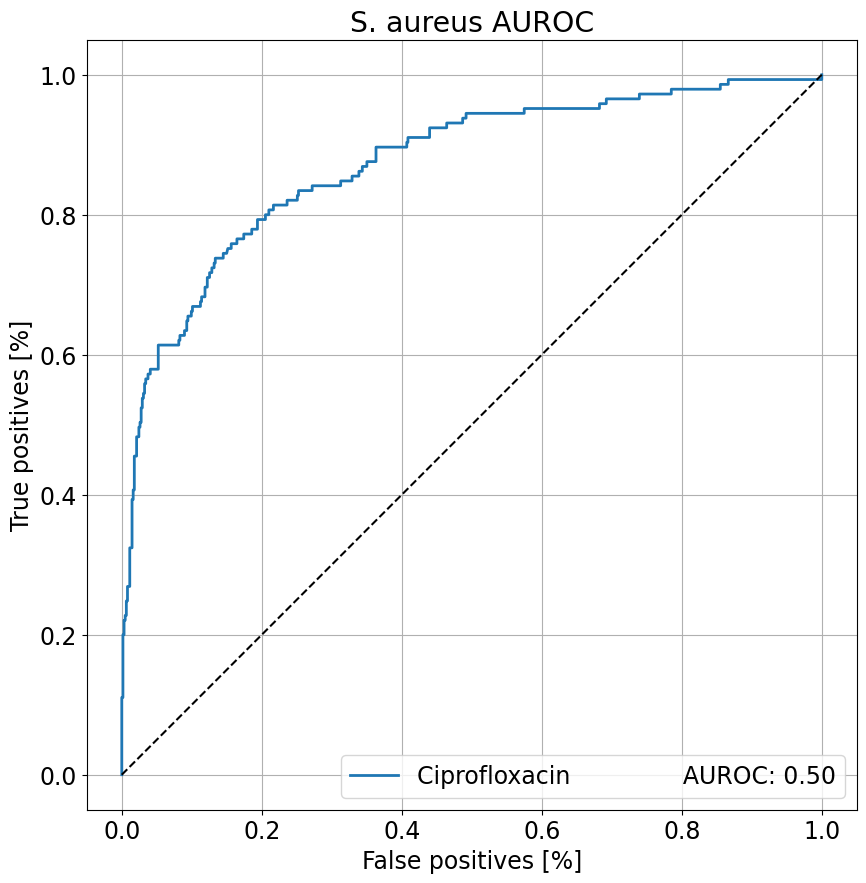

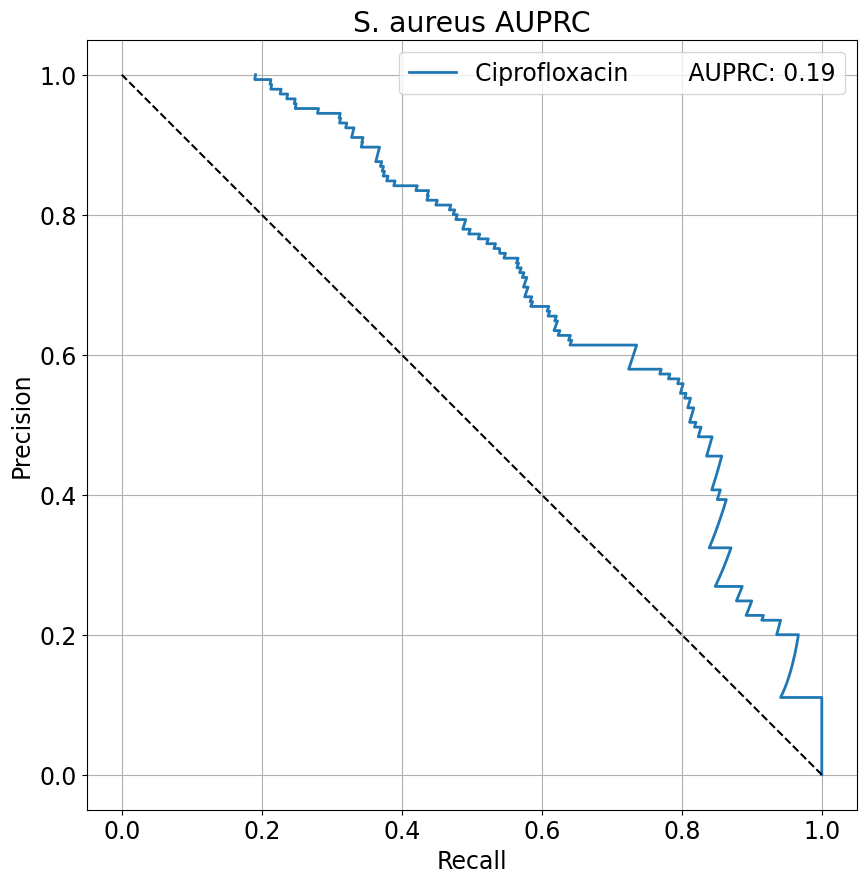

In [ ]:
plt.rcParams['figure.figsize'] = (12, 10)
plt.rcParams.update({'font.size': 17})
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

def plot_roc(name, labels, predictions, **kwargs):
  fp, tp, _ = sklearn.metrics.roc_curve(labels, predictions)

  plt.plot(fp, tp, label=name, linewidth=2, **kwargs)
  plt.plot([0, 1], [0, 1], 'k--')
  plt.title('E. coli CNN')
  plt.xlabel('False positives [%]')
  plt.ylabel('True positives [%]')
  plt.title('S. aureus AUROC')

  plt.grid(True)
  ax = plt.gca()
  ax.set_aspect('equal')
plot_roc("Ciprofloxacin               AUROC: %0.2f" % baseline_results[8], y_test, test_predictions_baseline, color=colors[0])

plt.legend(loc='lower right')
plt.savefig('s_aureus_auroc.png', bbox_inches='tight')
plt.show()

def plot_prc(name, labels, predictions, **kwargs):
    precision, recall, _ = sklearn.metrics.precision_recall_curve(labels, predictions)

    plt.plot(precision, recall, label=name, linewidth=2, **kwargs)
    plt.title('S. aureus AUPRC')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.plot([1, 0], [0, 1], 'k--')
    plt.grid(True)
    ax = plt.gca()
    ax.set_aspect('equal')

plot_prc("Ciprofloxacin        AUPRC: %0.2f" % baseline_results[9], y_test, test_predictions_baseline, color=colors[0])

plt.legend(loc='upper right')
plt.savefig('s_aureus_auprc.png', bbox_inches='tight')
plt.show()